# Model Pruning Experiments

This notebook demonstrates pruning experiments on:
1. Vision Transformer (ViT)
2. Deep Compression AutoEncoder (DC-AE)

In [1]:
# Clone the repository
!git clone https://github.com/tahahah/model-pruning-experiments.git
%cd model-pruning-experiments

# Install dependencies
!uv pip install --system -r requirements.txt

Streaming output truncated to the last 5000 lines.
torchmetrics ------------------------------ 366.10 KiB/905.57 KiB
jedi       ------------------------------ 238.89 KiB/1.50 MiB
onnxsim    ------------------------------ 1.53 MiB/2.15 MiB
igraph     ------------------------------ 1.58 MiB/3.00 MiB
ruff       ------------------------------ 1.55 MiB/11.92 MiB
onnxruntime ------------------------------ 286.00 KiB/12.71 MiB
nvidia-cuda-cupti-cu12 ------------------------------ 1.64 MiB/13.17 MiB
onnx       ------------------------------ 1.50 MiB/15.30 MiB
nvidia-nvjitlink-cu12 ------------------------------ 1.45 MiB/20.09 MiB
nvidia-cuda-nvrtc-cu12 ------------------------------ 1.57 MiB/23.50 MiB
nvidia-curand-cu12 ------------------------------ 1.53 MiB/53.70 MiB
gradio     ------------------------------ 381.52 KiB/59.32 MiB
nvidia-cusolver-cu12 ------------------------------ 1.84 MiB/122.01 MiB
nvidia-cusparse-cu12 ------------------------------ 1.59 MiB/197.84 MiB
   Building antlr4-py

## 1. Vision Transformer (ViT) Pruning

In [ ]:
%cd model-pruning-experiments

/content/model-pruning-experiments


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Resolving data files:   0%|          | 0/339 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/339 [00:00<?, ?it/s]

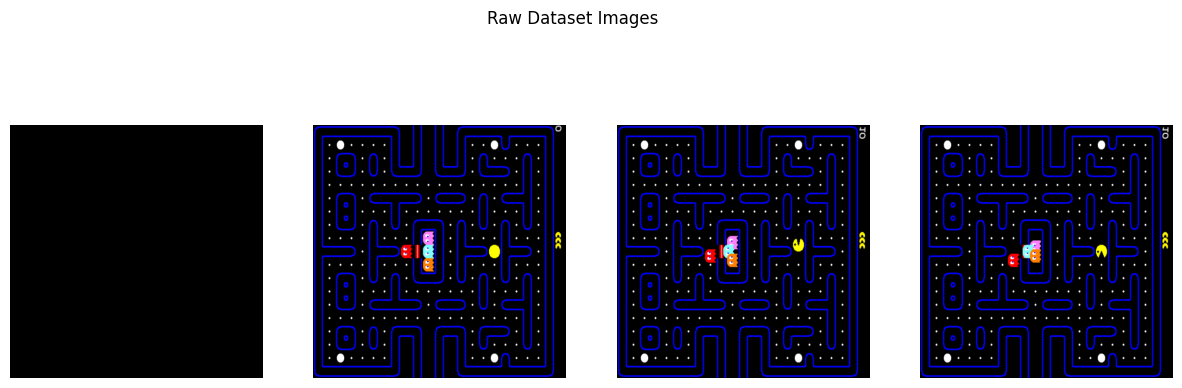

<Figure size 1500x500 with 0 Axes>

In [ ]:
import sys
import os
sys.path.append(os.path.abspath('..'))

import torch
import matplotlib.pyplot as plt
from dcaecore.pacman_dataset_copy import PacmanDatasetProviderConfig, SimplePacmanDatasetProvider, StreamingPacmanDataset

plt.rcParams['figure.figsize'] = [15, 5]
# First, let's verify we can get raw images directly from the dataset
cfg = PacmanDatasetProviderConfig()
raw_dataset = StreamingPacmanDataset(cfg, cfg.train_dataset, cfg.train_split)
raw_iter = iter(raw_dataset)

# Get a few raw samples and display them
plt.figure(figsize=(15, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    sample = next(raw_iter)
    # Convert from [-1,1] to [0,1] range
    img = (sample['data'] + 1) / 2
    plt.imshow(img.permute(1, 2, 0))
    plt.axis('off')
plt.suptitle('Raw Dataset Images')
plt.show()
plt.savefig("my_chart.png")

In [ ]:
data_provider.train.dataset.dataset.features

{'episode': Value(dtype='int64', id=None),
 'frame_image': Image(mode=None, decode=True, id=None),
 'action': Value(dtype='int64', id=None),
 'next_frame_image': Image(mode=None, decode=True, id=None),
 'done': Value(dtype='bool', id=None)}

In [ ]:
# Show multiple batches to see streaming behavior
print("Showing 3 consecutive batches from training dataset...")
for _ in range(3):
    train_batch = next(iter(data_provider.train))
    show_batch(train_batch, f'Training Batch {_+1}')
    plt.show()

In [ ]:
from vit_pruning_analysis import *

# Run ViT pruning analysis
main()

## 2. DC-AE Pruning

In [ ]:
!git stash && git pull

Saved working directory and index state WIP on master: 74f3dfa fix: incorrect import utils
Already up to date.


In [ ]:
!python vae_pruning_analysis.py

Loading DC-AE model...
Using device: cuda

Analyzing original model...

Model Sparsity Analysis:
Total Parameters: 323,105,472
Non-zero Parameters: 323,105,472 (100.0%)
Zero Parameters: 0 (0.0%)

Top 10 Most Sparse Layers:
                                                                      Layer     Size  NonZero  Sparsity(%)
125                          decoder.project_out.op_list.2.conv.conv.weight    27648    27648          0.0
0                                       encoder.project_in.conv.conv.weight     1728     1728          0.0
1                         encoder.stages.1.op_list.0.main.conv1.conv.weight   589824   589824          0.0
2                         encoder.stages.1.op_list.0.main.conv2.conv.weight   589824   589824          0.0
3                         encoder.stages.1.op_list.1.main.conv1.conv.weight   589824   589824          0.0
4                         encoder.stages.1.op_list.1.main.conv2.conv.weight   589824   589824          0.0
110          decoder.stages.

## 3. Finetuning DC AE

In [ ]:
!uv pip install --system datasets
!wandb login

Using Python 3.11.11 environment at: /usr
Audited 1 package in 115ms
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: tahaa to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [ ]:
import os

os.environ["RANK"] = "0"
os.environ["WORLD_SIZE"] = "1"
os.environ["LOCAL_RANK"] = "0"
os.environ["MASTER_ADDR"] = "localhost"
os.environ["MASTER_PORT"] = "29500"

In [ ]:
!python dcaecore/train_dc_ae.py --config dcaecore/config.yaml --pretrained "mit-han-lab/dc-ae-f32c32-in-1.0" --output_dir dcaecore/outputs --gpu 0

Resolving data files: 100% 339/339 [00:00<00:00, 2778.46it/s]
Resolving data files: 100% 339/339 [00:00<00:00, 33612.34it/s]
Resolving data files: 100% 339/339 [00:00<00:00, 33535.44it/s]
Resolving data files: 100% 339/339 [00:00<00:00, 418566.10it/s]
2025-02-14 06:29:52,691 - dcae_training - INFO - Set random seed to 42
wandb: Currently logged in as: tahaa to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Tracking run with wandb version 0.19.6
wandb: Run data is saved locally in /content/model-pruning-experiments/model-pruning-experiments/model-pruning-experiments/model-pruning-experiments/wandb/run-20250214_062952-rjirtx6f
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run cherubic-valentine-20
wandb: ⭐️ View project at https://wandb.ai/tahaa/dcae-finetuning
wandb: 🚀 View run at https://wandb.ai/tahaa/dcae-finetuning/runs/rjirtx6f
2

In [ ]:
!git reset --hard && git pull


HEAD is now at 3ffb5b0 feat: better model naming
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 3 (delta 2), reused 3 (delta 2), pack-reused 0 (from 0)
Unpacking objects: 100% (3/3), 315 bytes | 157.00 KiB/s, done.
From https://github.com/tahahah/model-pruning-experiments
   3ffb5b0..0d61fda  master     -> origin/master
Updating 3ffb5b0..0d61fda
Fast-forward
 iterative_prune_retrain.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


## 4. Interactive Pruning

In [ ]:
!python iterative_prune_retrain.py --config dcaecore/config.yaml --model_path "mit-han-lab/dc-ae-f32c32-in-1.0" --save_dir ./pruned_models --gpu 0

Resolving data files: 100% 339/339 [00:00<00:00, 2712.68it/s]
Resolving data files: 100% 339/339 [00:00<00:00, 64692.16it/s]
Resolving data files: 100% 339/339 [00:00<00:00, 33097.51it/s]
Resolving data files: 100% 339/339 [00:00<00:00, 421544.34it/s]
2025-02-14 07:37:16,048 - dcae_training - INFO - 
=== Starting iteration 1 ===
2025-02-14 07:37:16,048 - dcae_training - INFO - Current model statistics:

Model Sparsity Analysis:
Total Parameters: 323,105,472
Non-zero Parameters: 323,105,472 (100.0%)
Zero Parameters: 0 (0.0%)

Top 10 Most Sparse Layers:
                                                 Layer     Size  NonZero  Sparsity(%)
0                  encoder.project_in.conv.conv.weight     1728     1728          0.0
79   decoder.stages.2.op_list.4.main.conv1.conv.weight  2359296  2359296          0.0
92  decoder.stages.2.op_list.10.main.conv2.conv.weight  2359296  2359296          0.0
91  decoder.stages.2.op_list.10.main.conv1.conv.weight  2359296  2359296          0.0
90   decoder

In [ ]:
!rm -rf ./pruned_models
!mkdir ./pruned_models

## 5. Gradio UI

In [46]:
!git reset --hard && git pull

HEAD is now at cb85514 forgot to add self
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 2), reused 3 (delta 2), pack-reused 0 (from 0)
Unpacking objects: 100% (3/3), 522 bytes | 104.00 KiB/s, done.
From https://github.com/tahahah/model-pruning-experiments
   cb85514..0d9fcd5  master     -> origin/master
Updating cb85514..0d9fcd5
Fast-forward
 vae_pruning_analysis.py | 11 +++++++++--
 1 file changed, 9 insertions(+), 2 deletions(-)


In [47]:
!python app.py

/usr/local/lib/python3.11/dist-packages/torchmetrics/functional/image/lpips.py:323: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(model_path,

## View Results

The results are saved in the `output` directory:
- Pruning analysis reports
- Reconstructed images
- Model statistics